In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, normalized_mutual_info_score, accuracy_score
from scipy.optimize import linear_sum_assignment
import numpy as np

final_data = pd.read_csv('../data/final_processing_afterfeatureselection.csv')
final_data

,PC1,PC2,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,condition
0,-0.039233,-0.253788,-0.700899,0.301111,-0.839961,0.688526,-0.810877,0.156861,-0.207767,1.431996,0.352972,0.614194,0.381826,-0.038288,-0.145796,0
1,-1.141627,-0.809808,0.344283,0.196894,-0.099172,-0.798856,-0.473560,-0.336210,0.258290,-0.100696,-0.555420,-0.648638,0.670350,0.226474,0.100075,1
2,-1.868282,-0.323053,0.142862,0.052773,0.159603,0.079444,-0.003839,-0.069681,0.851798,-0.242212,0.014812,0.007963,-0.295652,0.084054,-0.171274,1
3,0.902116,0.610200,-0.617978,0.342487,-0.382084,-0.433267,0.038261,-0.507393,0.169220,0.991255,-0.374363,-0.248837,-0.561927,-0.284056,0.240965,0
4,1.298818,-0.884515,0.469796,0.341791,0.323519,0.306327,0.118823,0.802930,0.027827,-0.051346,-0.174917,0.067726,-0.016932,-0.187003,0.061194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.241793,0.876853,-1.102780,0.547618,0.337560,0.207472,-0.028955,0.236387,0.073171,0.198052,0.836868,-0.197183,0.327486,-0.216300,-0.261663,1
299,-0.986426,0.690337,-0.710955,-0.726882,-0.074197,1.048600,-1.105459,-0.353621,0.195977,-0.270145,0.101315,-0.084849,-0.398143,0.198260,0.046050,1
300,-1.604664,0.756485,0.089254,-0.446223,0.180731,-0.535324,0.116328,0.152382,-0.331112,-0.020602,0.125362,-0.047554,-0.075621,0.018241,-0.055046,1
301,0.398393,-1.331490,-0.341713,-0.655132,0.767891,-0.481505,-0.246584,1.034815,-0.227725,-0.023999,-0.094172,-0.001797,-0.172947,-0.134631,0.111055,1


In [2]:
x = final_data.drop(columns=['condition'])
y_true = final_data['condition']
x

,PC1,PC2,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.039233,-0.253788,-0.700899,0.301111,-0.839961,0.688526,-0.810877,0.156861,-0.207767,1.431996,0.352972,0.614194,0.381826,-0.038288,-0.145796
1,-1.141627,-0.809808,0.344283,0.196894,-0.099172,-0.798856,-0.473560,-0.336210,0.258290,-0.100696,-0.555420,-0.648638,0.670350,0.226474,0.100075
2,-1.868282,-0.323053,0.142862,0.052773,0.159603,0.079444,-0.003839,-0.069681,0.851798,-0.242212,0.014812,0.007963,-0.295652,0.084054,-0.171274
3,0.902116,0.610200,-0.617978,0.342487,-0.382084,-0.433267,0.038261,-0.507393,0.169220,0.991255,-0.374363,-0.248837,-0.561927,-0.284056,0.240965
4,1.298818,-0.884515,0.469796,0.341791,0.323519,0.306327,0.118823,0.802930,0.027827,-0.051346,-0.174917,0.067726,-0.016932,-0.187003,0.061194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.241793,0.876853,-1.102780,0.547618,0.337560,0.207472,-0.028955,0.236387,0.073171,0.198052,0.836868,-0.197183,0.327486,-0.216300,-0.261663
299,-0.986426,0.690337,-0.710955,-0.726882,-0.074197,1.048600,-1.105459,-0.353621,0.195977,-0.270145,0.101315,-0.084849,-0.398143,0.198260,0.046050
300,-1.604664,0.756485,0.089254,-0.446223,0.180731,-0.535324,0.116328,0.152382,-0.331112,-0.020602,0.125362,-0.047554,-0.075621,0.018241,-0.055046
301,0.398393,-1.331490,-0.341713,-0.655132,0.767891,-0.481505,-0.246584,1.034815,-0.227725,-0.023999,-0.094172,-0.001797,-0.172947,-0.134631,0.111055


In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_x = pca.fit_transform(x)
pca_x = pd.DataFrame(pca_x, columns=['PC1', 'PC2'])

In [4]:
def cluster_accuracy(y_true, y_pred):
    labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    
    cost_matrix = np.zeros((len(labels), len(pred_labels)))
    for i, true_label in enumerate(labels):
        for j, pred_label in enumerate(pred_labels):
            cost_matrix[i, j] = -np.sum((y_true == true_label) & (y_pred == pred_label))
    
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    mapping = dict(zip(col_ind, row_ind))
    
    y_aligned = np.array([mapping[label] for label in y_pred])
    return accuracy_score(y_true, y_aligned)

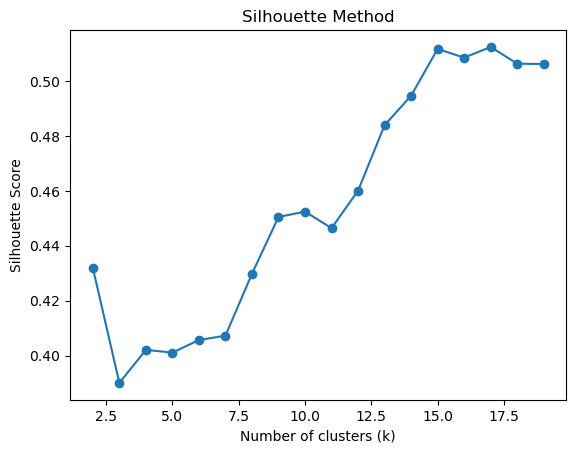

In [5]:
from sklearn.cluster import KMeans

scores = []
for k in range(2, 20): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_x)
    score = silhouette_score(pca_x, labels)
    scores.append(score)

plt.plot(range(2, 20), scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

Labels: [14  0  7  6  4 10 12  8  5  5  1  4  0  6  6 10  9  6  2 10 14  4  8  1
  7 13  2 13  6  7 13  3 10  3  6  6  7  7 11  1  0  9  2 10  4 14 10  5
  4  8  2  9  8 13  3  7  9  1  8 14  5 12  7  2  3  7  8  1  5  6  2  3
 11 14  8  4  7  4  8  5  0 12 13  5 10 13 13  4  4  4 14 14  9 13  4  3
  7  0  6  8  8 13 12  4  9  6  3 14 11  3  0  0 14  0  1  9 13 13  5  5
  5  0  1  3 14  4  0 11 10 13 14  9 13 14 13  4  3  5  3  8  6 14 10  3
  5 10  5 10 13  2  9 12 12  7  0 14  3  1  5  9  6 14 13 12  6  3 10 12
  5 13  3  5 14 12  0 11  9  7  6  8  5  0  8  1  4  2  9  3  1 14 10 11
  7  8  4  0 14 12  2 13  4  8  9  6  9  7  7  7 10 14  2  3  8  5  6 14
  2 12  8  8  4  4  2 11 14  2  6  2  0 14  4 14  8 12  2  0  5  1 13 10
 10  2 13  1  2  1  9  0  9 13  3  3 11  4  1 13 13  4 13  6 13  4  2 10
  0  3  1  1  9 10  5  1 11  8  6 14 12 13  8  8 11 10  7 10  9  1  0  9
  1  6 14  2  3  5 14 10  0  5  9  3 11 12 10] 

Centers: [[-1.08100197 -0.83201843]
 [-0.13267793  0.25003112]
 [ 1

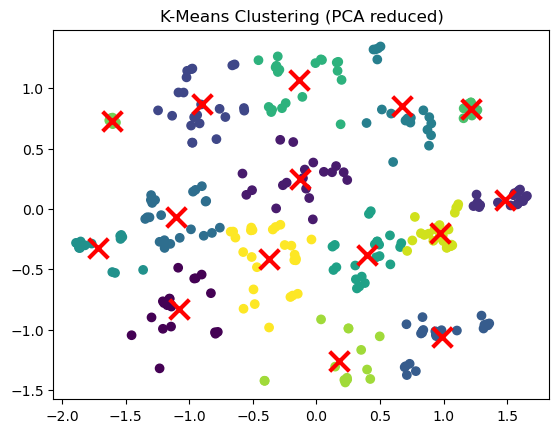

The average silhouette_score is: 0.5117095286830087
Adjusted Rand Index (ARI): 0.06250964552364835
Normalized Mutual Info (NMI): 0.18197388233695158


In [6]:
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(pca_x)

print('Labels:', kmeans.labels_, '\n')
print('Centers:', kmeans.cluster_centers_, '\n')

plt.scatter(pca_x['PC1'], pca_x['PC2'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('K-Means Clustering (PCA reduced)')
plt.show()

silhouette_avg = silhouette_score(pca_x, kmeans.labels_)
print(f"The average silhouette_score is: {silhouette_avg}")

ari = adjusted_rand_score(y_true, kmeans.labels_)
nmi = normalized_mutual_info_score(y_true, kmeans.labels_)

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Info (NMI):", nmi)

Labels: [0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0
 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0
 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0
 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0
 1 1 1 1 1 0 0] 

Centers: [[ 0.82310219 -0.04482078]
 [-0.89689756  0.0488392 ]] 



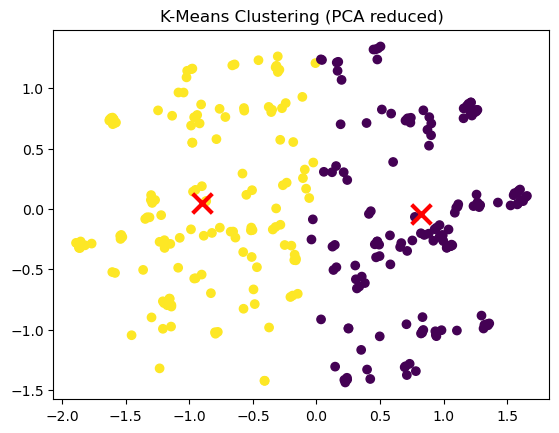

The average silhouette_score is: 0.4319578463726729
Adjusted Rand Index (ARI): 0.4294611176020748
Normalized Mutual Info (NMI): 0.33850070289267453
Clustering Accuracy Comparing to Labels: 0.8283828382838284


['../models/unsupervised_kmeans.pkl']

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(pca_x)

print('Labels:', kmeans.labels_, '\n')
print('Centers:', kmeans.cluster_centers_, '\n')

plt.scatter(pca_x['PC1'], pca_x['PC2'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('K-Means Clustering (PCA reduced)')
plt.show()

silhouette_avg = silhouette_score(pca_x, kmeans.labels_)
print(f"The average silhouette_score is: {silhouette_avg}")

ari = adjusted_rand_score(y_true, kmeans.labels_)
nmi = normalized_mutual_info_score(y_true, kmeans.labels_)

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Info (NMI):", nmi)

acc = cluster_accuracy(y_true, kmeans.labels_)
print("Clustering Accuracy Comparing to Labels:", acc)

joblib.dump(kmeans, "../models/unsupervised_kmeans.pkl")

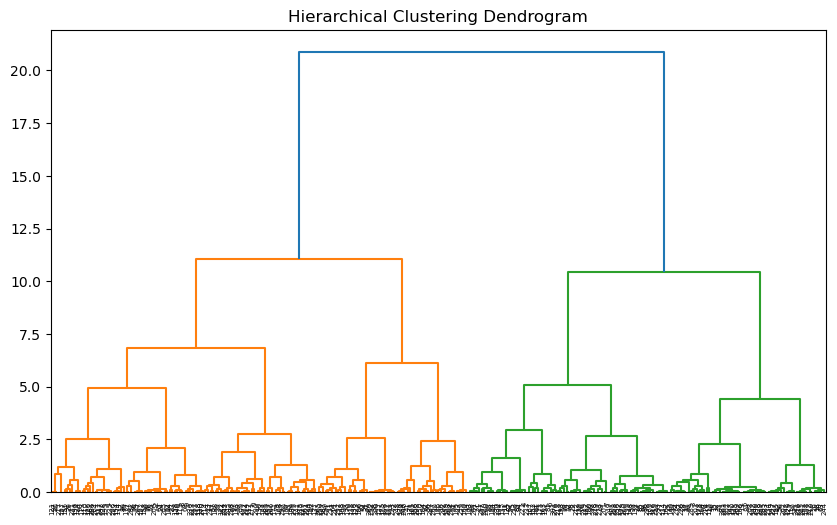


Hierarchical Clustering vs Target:
Target     0    1
Cluster          
0        122   18
1         42  121 

Adjusted Rand Index (ARI): 0.363
Adjusted Mutual Info (AMI): 0.296
Silhouette Score: 0.424


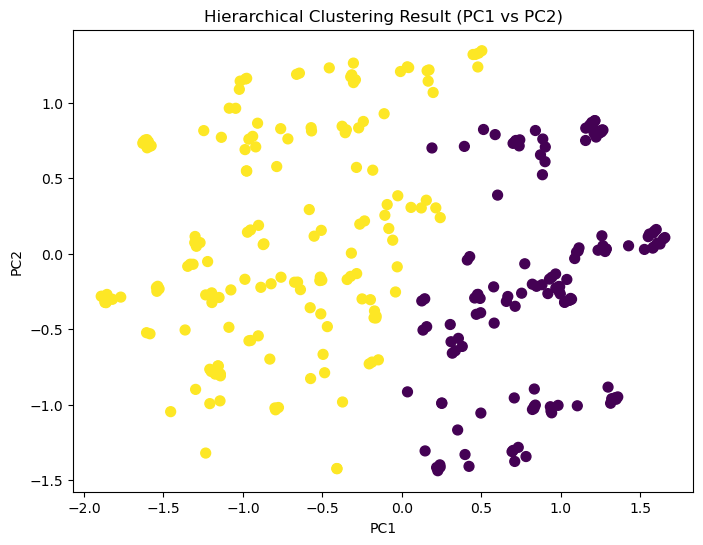

['../models/unsupervised_hierarchicalclustering.pkl']

In [8]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(pca_x, method="ward")

plt.figure(figsize=(10,6))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

hier = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")
clusters_hier = hier.fit_predict(pca_x)

cm = confusion_matrix(y_true, clusters_hier)

if cm[0,0] + cm[1,1] < cm[0,1] + cm[1,0]:
    clusters_hier = 1 - clusters_hier 

pca_x["Cluster_Hierarchical"] = clusters_hier

crosstab_hier = pd.crosstab(pca_x["Cluster_Hierarchical"], y_true, rownames=["Cluster"], colnames=["Target"])
print("\nHierarchical Clustering vs Target:")
print(crosstab_hier, '\n')

ari = adjusted_rand_score(y_true, clusters_hier)
ami = adjusted_mutual_info_score(y_true, clusters_hier)
sil = silhouette_score(pca_x.drop("Cluster_Hierarchical", axis=1), clusters_hier)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Adjusted Mutual Info (AMI): {ami:.3f}")
print(f"Silhouette Score: {sil:.3f}")

plt.figure(figsize=(8,6))
plt.scatter(pca_x["PC1"], pca_x["PC2"], c=clusters_hier, cmap="viridis", s=50)
plt.title("Hierarchical Clustering Result (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

joblib.dump(hier, "../models/unsupervised_hierarchicalclustering.pkl")